In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import doctest

### Import initial tables

In [2]:
file_name1='D:/ASD/rocks/sudoku_01.json'
file_name2='D:/ASD/rocks/sudoku_02.json'

with open(file_name1, 'r') as jsonfile:
    sudoku1 = json.load(jsonfile)
    
with open(file_name2, 'r') as jsonfile:
    sudoku2 = json.load(jsonfile)

### Plot initial tables

In [3]:
def sudoku_plot(M):
    fig, ax = plt.subplots()
    im = ax.imshow(M, cmap='Blues', vmin=0, vmax=0, interpolation='none')
    plt.axis('off')
    for i in range(len(M)):
        for j in range(len(M[0])):
            if (M[i][j]==0):
                text = ax.text(i, j, M[i][j], ha="center", va="center", color="black")
            else:
                text = ax.text(i, j, M[i][j], ha="center", va="center", color="red")

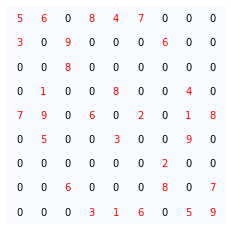

In [4]:
sudoku_plot(sudoku1)

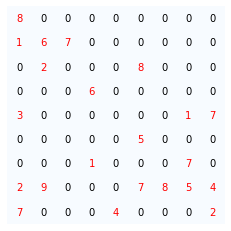

In [5]:
sudoku_plot(sudoku2)

### Dependencies

In [1]:
class Square:  #class that represents each square in a soduku table
    def __init__(self,K):
        if K==0:
            self.K = [1,2,3,4,5,6,7,8,9] #labels
        else:
            self.K = [K]
        self.N = [] #neighbors
        self.L = [] #links
    
    def is_paired(self,k1,S2):  #function that tests whether 2 squares have a pair of linked labels
        for link in self.L:
            if link.S[1] == S2 and link.K[0] == k1:
                return True
        return False
        

class Link:  #class that represents each link(arc) between neighboring squares and their states
    def __init__(self,S1,S2,K1,K2):
        self.S = [S1, S2] #neighbor pair
        self.K = [K1, K2] #label pair

In [2]:
def Mto_class(M): #function that takes the sudoku table (9x9 list) as an input and converts it into a 9x9 matrix of 'square' type objects
    A = []  
    l = range(len(M))
    for i in l:
        Al = []
        for j in l:
            Al.append(Square(M[i][j]))
        A.append(Al)
    for i in l:
        for j in l:
            N = []
            for k in l:
                if k!=j:
                    N.append(A[i][k])
            for k in l:
                if (k!=i):
                    N.append(A[k][j])
            if [0,3,6].count(i)!=0:
                if [0,3,6].count(j)!=0:
                    N.extend(A[i+1][j+1:j+3])
                    N.extend(A[i+2][j+1:j+3])
                elif [1,4,7].count(j)!=0:
                    N.append(A[i+1][j-1])
                    N.append(A[i+1][j+1])
                    N.append(A[i+2][j-1])
                    N.append(A[i+2][j+1])
                else:
                    N.extend(A[i+1][j-2:j])
                    N.extend(A[i+2][j-2:j])
            elif [1,4,7].count(i)!=0:
                if [0,3,6].count(j)!=0:
                    N.extend(A[i-1][j+1:j+3])
                    N.extend(A[i+1][j+1:j+3])
                elif [1,4,7].count(j)!=0:
                    N.append(A[i-1][j-1])
                    N.append(A[i-1][j+1])
                    N.append(A[i+1][j-1])
                    N.append(A[i+1][j+1])
                else:
                    N.extend(A[i-1][j-2:j])
                    N.extend(A[i+1][j-2:j])
            else:
                if [0,3,6].count(j)!=0:
                    N.extend(A[i-1][j+1:j+3])
                    N.extend(A[i-2][j+1:j+3])
                elif [1,4,7].count(j)!=0:
                    N.append(A[i-1][j-1]) 
                    N.append(A[i-1][j+1]) 
                    N.append(A[i-2][j-1])
                    N.append(A[i-2][j+1])
                else:
                    N.extend(A[i-1][j-2:j])
                    N.extend(A[i-2][j-2:j])
            A[i][j].N.extend(N)
    return A